# Plots
<hr style="clear:both">

This notebook presents and displays our plot illustrating out story.


**Project Mentor:** [Shuo Wen](http://personnes.epfl.ch/shuo.wen) ([Email](shuo.wen@epfl.ch)),
**Authors:** Mahmoud Dokmak, Matthieu Borello, Léo Brunneau, Loïc Domingos, Bastien Armstrong

<hr style="clear:both">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as stats
from dash.dependencies import Input, Output
import dash
from dash import dcc, html
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact

In [15]:
movies = pd.read_pickle('./data/Success_Metric.pkl')
movies_non_normalized = pd.read_pickle('./data/Data_For_Score.pkl')

In [3]:
import plotly.express as px
import pandas as pd

# Extract year from the release date
movies['year'] = pd.to_datetime(movies['combined_release_date']).dt.year
movies['log_success_metric'] = np.log1p(movies['success_metric_scaled'])

# Create a Plotly Express density heatmap (hexbin-like plot)
fig = px.density_heatmap(
    movies,
    x='year',
    y='log_success_metric',
    # color='success_metric_scaled',
    color_continuous_scale='Blues',
    labels={'success_metric_scaled': 'Success Metric'},
    title='Movies Success by Year (log scale)',
    nbinsx=30,  # Number of bins along the x-axis (year)
    nbinsy=30,  # Number of bins along the y-axis (success metric)
    # log_x=True   # Use log scale for the color intensity
)

# Customize layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Success Score",
    height=600,
    width=900
)

# Export to an interactive HTML file
fig.write_html("plots/movie_success_density_heatmap.html")

# Show the plot
fig.show()

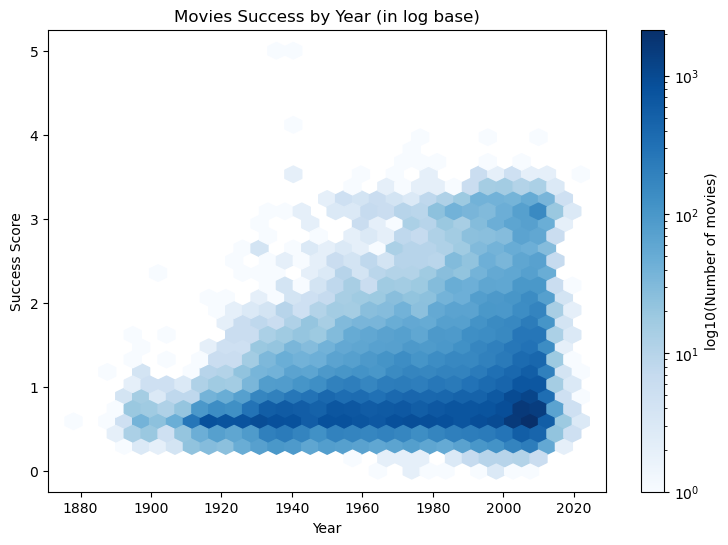

In [4]:
# Hexbin plot
# Create a copy to not modify our final dataframe
# Keeping only the year as we are looking at year distribution
success_by_year = movies.copy()
success_by_year['year'] = pd.to_datetime(success_by_year['combined_release_date']).dt.year
plt.figure(figsize=(9, 6))
plt.hexbin(success_by_year['year'], success_by_year['success_metric_scaled'],gridsize=30,cmap='Blues',bins='log')
plt.colorbar(label='log10(Number of movies)')

# Set the title and labels
plt.xlabel('Year')
plt.ylabel('Success Score')
plt.title('Movies Success by Year (in log base)')

plt.savefig('plots/movie_success_hexbin.png', dpi=300, bbox_inches='tight')
plt.show()



This plot represent the number of movies of a particular genre released per year.

This plot represent the distribution of the success metric assigned to the movies.


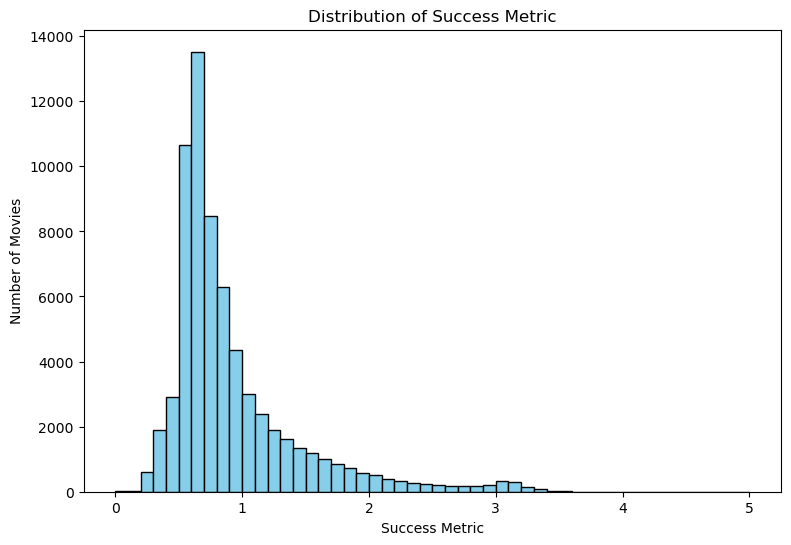

In [5]:
movies.head(10)
# Create a histogram of the Success_metric
plt.figure(figsize=(9, 6))
plt.hist(movies['success_metric_scaled'].dropna(), bins=50, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Success Metric')
plt.xlabel('Success Metric')
plt.ylabel('Number of Movies')

# Show the plot
plt.savefig('plots/success_metric_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Line plot
# Keeping only the year as we are looking at year distribution
movies['year'] = pd.to_datetime(movies['combined_release_date']).dt.year
# Explode the genres to have one genre per row to be able to count them
movies['movie_genres_final'] = movies['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
n_genre_per_year = movies.explode('movie_genres_final')
# Keep only the top 20 genres
genre_counts = n_genre_per_year['movie_genres_final'].value_counts()
best_genres = genre_counts.head(20).index.tolist()
n_genre_per_year = n_genre_per_year[n_genre_per_year['movie_genres_final'].isin(best_genres)]
# Ensure the order of the genres
n_genre_per_year['movie_genres_final'] = pd.Categorical(n_genre_per_year['movie_genres_final'],categories=best_genres, ordered=True)
# Count the number of movies per genre per year
n_genre_per_year = n_genre_per_year.groupby(['year', 'movie_genres_final']).size().reset_index(name='movie_count')
n_genre_per_year.head()

year movie_genres_final  movie_count
0  1878              Drama            0
1  1878             Comedy            0
2  1878       Romance Film            0
3  1878           Thriller            0
4  1878    Black-and-white            0

In [7]:
# Generate the line plot as before
fig = px.line(n_genre_per_year, x='year', y='movie_count', color='movie_genres_final',
              title='Top 15 Movies Count by Genre Over Time',
              labels={'year': 'Release Year', 'movie_count': 'Number of Movies', 'movie_genres_final': 'Genres'},
              )

# Update layout to set white background
fig.update_layout(
    paper_bgcolor='white',  # Set the overall figure background color to white
    legend=dict(itemclick="toggleothers")  # Allow toggling of the genres in the legend
)

# Show the plot
fig.write_html('plots/movie_counts_by_genre.html', full_html=True)
fig.show()

In [8]:
# Line plot
# Keeping only the year as we are looking at year distribution
movies['year'] = pd.to_datetime(movies['combined_release_date']).dt.year
# Explode the genres to have one genre per row to be able to count them
movies['movie_genres_final'] = movies['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
n_genre_per_year = movies.explode('movie_genres_final')
# Keep only the top 20 genres
genre_counts = n_genre_per_year['movie_genres_final'].value_counts()
best_genres = ['Silent film', 'War film', 'Black-and-white', 'Western']
n_genre_per_year = n_genre_per_year[n_genre_per_year['movie_genres_final'].isin(best_genres)]
# Ensure the order of the genres
n_genre_per_year['movie_genres_final'] = pd.Categorical(n_genre_per_year['movie_genres_final'],categories=best_genres, ordered=True)
# Count the number of movies per genre per year
n_genre_per_year = n_genre_per_year.groupby(['year', 'movie_genres_final']).size().reset_index(name='movie_count')
n_genre_per_year.head()

year movie_genres_final  movie_count
0  1878        Silent film            1
1  1878           War film            0
2  1878    Black-and-white            0
3  1878            Western            0
4  1888        Silent film            1

In [ ]:
movies_non_normalized['year'] = pd.to_datetime(movies_non_normalized['combined_release_date']).dt.year

# Explode genres to have one genre per row
movies_non_normalized['movie_genres_final'] = movies_non_normalized['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
n_genre_per_year = movies_non_normalized.explode('movie_genres_final')

# Keep only the top 20 genres
genre_counts = n_genre_per_year['movie_genres_final'].value_counts()
best_genres = genre_counts.head(20).index.tolist()
n_genre_per_year = n_genre_per_year[n_genre_per_year['movie_genres_final'].isin(best_genres)]

# Ensure the order of the genres
n_genre_per_year['movie_genres_final'] = pd.Categorical(
    n_genre_per_year['movie_genres_final'], categories=best_genres, ordered=True
)

# Aggregate metrics by year and genre
aggregated_data = n_genre_per_year.groupby(['year', 'movie_genres_final']).agg(
    movie_count=('movie_genres_final', 'size'),
    inflation_adjusted_box_office_revenue=('inflation_adjusted_box_office_revenue', 'sum'),
    popularity=('popularity', 'mean'),
    sa_score=('sa_score', 'mean'),
    avgRating=('avgRating', 'mean')
).reset_index()

# Create a figure
fig = go.Figure()

# Add traces for each genre for the default metric ('movie_count')
for genre in best_genres:
    genre_data = aggregated_data[aggregated_data['movie_genres_final'] == genre]
    fig.add_trace(go.Scatter(
        x=genre_data['year'],
        y=genre_data['movie_count'],  # Default metric
        mode='lines',
        name=genre,
        visible=True  # Show all genres
    ))

# Update layout with dropdown
metrics = {
    'movie_count': 'Number of Movies',
    'inflation_adjusted_box_office_revenue': 'Box Office Revenue (Adjusted)',
    'popularity': 'Popularity',
    'sa_score': 'Sentiment Analysis Score',
    'avgRating': 'Average Rating'
}

fig.update_layout(
    title="Dynamic Movie Metrics by Genre",
    xaxis_title="Release Year",
    yaxis_title="Metric Value",
    paper_bgcolor='white',
    updatemenus=[
        {
            'buttons': [
                {
                    'method': 'update',
                    'label': label,
                    'args': [
                        {
                            'y': [
                                aggregated_data[aggregated_data['movie_genres_final'] == genre][metric]
                                for genre in best_genres
                            ]
                        },
                        {'yaxis': {'title': label}}
                    ]
                }
                for metric, label in metrics.items()
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Save to standalone HTML
fig.write_html("./plots/movie_metrics_all_genres.html")
fig.show()

In [9]:
fig = px.line(n_genre_per_year, x='year', y='movie_count', color='movie_genres_final',
              title='Movie Counts for Selected Genres Over Time',
              labels={'year': 'Release Year', 'movie_count': 'Number of Movies', 'movie_genres_final': 'Genres'},
              )

# Update layout to set white background
fig.update_layout(
    paper_bgcolor='white',  # Set the overall figure background color to white
    legend=dict(itemclick="toggleothers")  # Allow toggling of the genres in the legend
)

# Show the plot
fig.write_html('plots/movie_counts_by_genre_subset.html', full_html=True)
fig.show()

In [10]:
# Histogram
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=movies['success_metric_scaled'],
    nbinsx=75,
    marker_color='skyblue',
    opacity=0.7
))

fig.update_layout(
    title='Success Score Distribution',
    xaxis_title='Success Score',
    yaxis_title='Number of Movies',
    template='plotly_white',
    hovermode='closest',
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=4000,
        tickformat='d',
    ),
)

fig.write_html('plots/success_score_distribution.html', full_html=False)
fig.show()


In [11]:
# Donut chart
# Movies have more than one genre, so we need to explode the genres to count them
movies_pie_df = movies.copy()
movies_pie_df['movie_genres_final'] = movies_pie_df['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
genre_per_film = movies.explode('movie_genres_final')
# Put the genres that are not in the top 20 represented in our dataframe in the "Others" category
n_genres = genre_per_film['movie_genres_final'].value_counts()
top_20_genres = n_genres.head(20).index.tolist()
genre_per_film['movie_genres_final'] = genre_per_film['movie_genres_final'].apply(lambda x: x if x in top_20_genres else 'Others')
# Recalculate the number of movies per genre with the new "Others" category
n_genres = genre_per_film['movie_genres_final'].value_counts().reset_index()
n_genres.columns = ['Genre', 'Count']
fig = px.pie(
    n_genres,
    names='Genre',
    values='Count',
    title='Distribution of Number of Movies by Genre',
    hole=0.4
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True, height=600)

fig.write_html('plots/genre_piechart.html', full_html=False)
fig.show()

In [12]:
# Precompute datasets
def compute_country_success(movies, top_n=None):
    all_countries_per_film = movies.explode('movie_countries_final')
    if top_n:
        country_success = all_countries_per_film.groupby('movie_countries_final', group_keys=False)\
            .apply(lambda x: x.nlargest(top_n, 'success_metric_scaled'))\
            .groupby('movie_countries_final')['success_metric_scaled'].mean().reset_index()
    else:
        country_success = all_countries_per_film.groupby('movie_countries_final')['success_metric_scaled'].mean().reset_index()
    return country_success

# Precompute data for different top N values
datasets = {
    f"Top {n}": compute_country_success(movies, n)
    for n in [10, 50, 100, 200, 500]
}
datasets['All Movies'] = compute_country_success(movies, None)

# Define the color range explicitly (0 to 5)
color_min, color_max = 0, 5

# Create the initial figure (default view: Top 10)
initial_data = datasets["Top 10"]
fig = px.choropleth(
    initial_data,
    locations='movie_countries_final',
    locationmode='country names',
    color='success_metric_scaled',
    hover_name='movie_countries_final',
    color_continuous_scale='Blues',
    labels={'success_metric_scaled': 'Mean Success Metric'},
    title='World Map of Mean Success Score by Country (Top 10 Movies)'
)

# Update the color axis to fix the range
fig.update_layout(coloraxis_colorbar=dict(title="Success Metric"), coloraxis=dict(cmin=color_min, cmax=color_max))

# Add dropdown to switch datasets
dropdown_buttons = []
for label, data in datasets.items():
    button = {
        "label": label,
        "method": "update",
        "args": [
            {"z": [data['success_metric_scaled']], "locations": [data['movie_countries_final']]},
            {"title": f"World Map of Mean Success Score by Country ({label})"}
        ]
    }
    dropdown_buttons.append(button)

# Update layout to include the dropdown
fig.update_layout(
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }]
)

# Save to standalone HTML
fig.write_html("plots/precomputed_choropleth_fixed_colorbar.html")
fig.show()

Very beautiful plot to display the most successfull movies

In [14]:
# Sort movies by success
most_successful = movies.sort_values(by='success_metric_scaled', ascending=False)

# Precompute data for Top 5, 10, 50, and 100
precomputed_data = {
    'Top 5': most_successful.head(5),
    'Top 10': most_successful.head(10),
    'Top 25': most_successful.head(25),
    'Top 50': most_successful.head(50),
}

# Create a function to generate a bar chart
def plot_top_movies(data, title):
    fig = px.bar(data,
                 x='movie_name',
                 y='success_metric_scaled',
                 title=title,
                 labels={'movie_name': 'Movie', 'success_metric_scaled': 'Success Score'},
                 hover_data=['movie_name', 'success_metric_scaled', 'Box_Office', 'rating'],
                 color_discrete_sequence=['skyblue'])
    fig.update_layout(
        xaxis_title="Movie",
        yaxis_title="Success Metric",
        xaxis_tickangle=-45,
        height=600,
    )
    return fig

# Generate the initial figure for "Top 5"
initial_data = precomputed_data['Top 5']
fig = plot_top_movies(initial_data, "Top 5 Movies by Success Metric")

# Add buttons for interactivity
buttons = []
for label, data in precomputed_data.items():
    buttons.append(
        dict(
            label=label,
            method="update",
            args=[
                {"x": [data['movie_name']], "y": [data['success_metric_scaled']]},
                {"title": f"{label} Movies by Success Metric"}
            ]
        )
    )

# Update the figure layout to include the buttons
fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }]
)

# Write to a standalone HTML file
fig.write_html("plots/top_movies.html")
fig.show()

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: plot_top_movies() missing 1 required positional argument: 'title'

